In [5]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163340 sha256=6ff843acc68b8e9bb12df93cf568fd3d09e02045357ffa1e555afe4d3e324a27
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [11]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNWithZScore
from surprise.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt

In [7]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

In [8]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [9]:
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df.head())


  user item  rating  timestamp
0  196  242     3.0  881250949
1  186  302     3.0  891717742
2   22  377     1.0  878887116
3  244   51     2.0  880606923
4  166  346     1.0  886397596


In [13]:
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_knnwithzscore = KNNWithZScore()

In [16]:
cv_results_svd = cross_validate(algo_svd, data, measures=['RMSE'], cv=5, verbose=True)
cv_results_svdpp = cross_validate(algo_svdpp , data, measures=['RMSE'], cv=5, verbose=True)
cv_results_nmf = cross_validate(algo_nmf, data, measures=['RMSE'], cv=5, verbose=True)
cv_results_knnbasic = cross_validate(algo_knnbasic, data, measures=['RMSE'], cv=5, verbose=True)
cv_results_knnwithzscore = cross_validate(algo_knnwithzscore, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9262  0.9422  0.9309  0.9347  0.9405  0.9349  0.0060  
Fit time          1.37    1.32    1.32    1.33    1.28    1.32    0.03    
Test time         0.17    0.13    0.13    0.13    0.13    0.14    0.02    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9183  0.9194  0.9157  0.9197  0.9159  0.9178  0.0017  
Fit time          26.76   27.23   28.29   36.05   31.18   29.90   3.44    
Test time         5.02    4.13    4.16    5.12    4.31    4.55    0.43    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9639  0.9638  0.9690  0.9692  0.9665  0.9665  0.0024  
Fit time          2.09    2.18    3.68    2.30    2.39    2.52    0.59    
Test time         0.24    

In [17]:
rmse_svd = cv_results_svd['test_rmse'].mean()
rmse_svdpp = cv_results_svdpp['test_rmse'].mean()
rmse_nmf = cv_results_nmf['test_rmse'].mean()
rmse_knnbasic = cv_results_knnbasic['test_rmse'].mean()
rmse_knnwithzscore = cv_results_knnwithzscore['test_rmse'].mean()

In [18]:
print(f"SVD:{rmse_svd}")
print(f"SVDPP:{rmse_svdpp}")
print(f"NMF:{rmse_nmf}")
print(f"KNNBasic:{rmse_knnbasic}")
print(f"KNNWithZScore:{rmse_knnwithzscore}")

SVD:0.934890019851877
SVDPP:0.9177915120105908
NMF:0.9665025252373203
KNNBasic:0.9791161311589394
KNNWithZScore:0.951792662416819


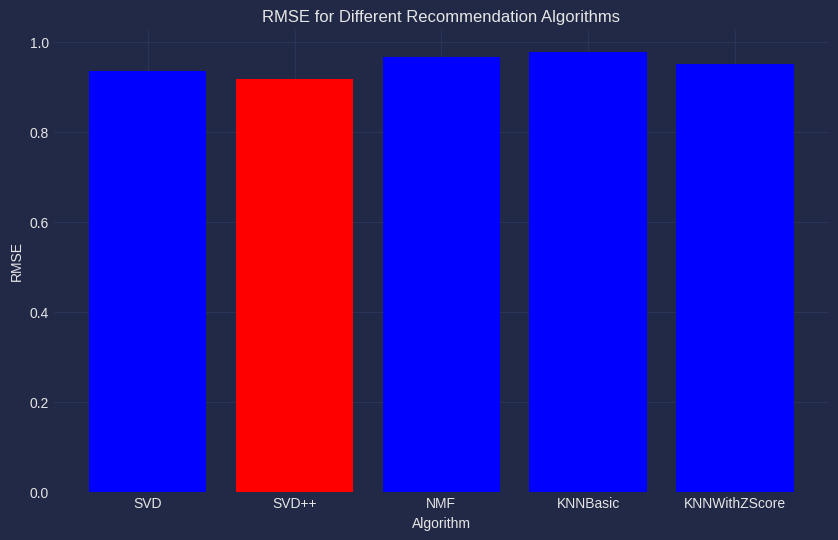

Best Algorithm: SVD++ with RMSE: 0.9177915120105908


In [24]:
rmse_values = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnwithzscore]
algorithms = ['SVD', 'SVD++', 'NMF', 'KNNBasic', 'KNNWithZScore']

# Знайти індекс алгоритму з найменшим RMSE
best_algorithm_index = rmse_values.index(min(rmse_values))
best_algorithm = algorithms[best_algorithm_index]
best_rmse = rmse_values[best_algorithm_index]

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.bar(algorithms, rmse_values, color=['blue' if alg != best_algorithm else 'red' for alg in algorithms])
plt.title('RMSE for Different Recommendation Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.show()

print(f"Best Algorithm: {best_algorithm} with RMSE: {best_rmse}")